In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
datapath = 'data/'

In [19]:
#products = dd.read_csv(datapath+'products.csv')
orders = pd.read_csv(datapath+'orders.csv')
#departments = dd.read_csv(datapath+'departments.csv')
#order_products = dd.read_csv(datapath+'order_products__prior.csv')
#aisles = dd.read_csv(datapath+'aisles.csv')

In [21]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083.00,3421083.00,3421083.00,3421083.00,3421083.00,3214874.00
mean,1710542.00,102978.21,17.15,2.78,13.45,11.11
std,987581.74,59533.72,17.73,2.05,4.23,9.21
min,1.00,1.00,1.00,0.00,0.00,0.00
25%,855271.50,51394.00,5.00,1.00,10.00,4.00
50%,1710542.00,102689.00,11.00,3.00,13.00,7.00
75%,2565812.50,154385.00,23.00,5.00,16.00,15.00
max,3421083.00,206209.00,100.00,6.00,23.00,30.00


In [37]:
df2 = orders.groupby(['order_dow','order_hour_of_day'])['days_since_prior_order'].mean().unstack('order_hour_of_day').fillna(0)

In [39]:
df2

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,11.85,12.17,12.82,12.57,12.44,12.02,11.34,11.09,11.24,11.50,...,12.01,12.02,11.96,11.98,11.72,11.44,11.02,10.91,10.78,10.95
1,12.23,12.10,11.57,11.79,12.11,11.70,10.78,10.72,10.62,10.68,...,11.54,11.56,11.64,11.82,11.67,11.53,11.24,11.08,11.25,11.15
2,12.05,12.59,11.70,11.76,12.51,11.69,10.97,10.79,10.80,10.96,...,11.11,11.17,11.29,11.37,11.48,11.15,10.88,10.76,10.80,11.15
3,12.23,12.36,12.15,12.28,11.79,11.30,10.53,10.49,10.43,10.45,...,10.73,10.77,11.00,10.97,10.98,10.92,10.45,10.35,10.61,10.64
4,11.83,12.19,11.65,12.45,11.71,11.22,10.31,10.14,10.18,10.25,...,10.58,10.48,10.56,10.73,10.81,10.74,10.43,10.18,10.15,10.40
5,11.53,11.75,11.86,12.22,11.89,11.57,10.48,10.44,10.26,10.19,...,10.39,10.37,10.48,10.71,10.92,10.86,10.52,10.53,10.50,10.68
6,11.67,11.97,11.63,12.24,12.51,11.58,11.26,10.81,11.14,11.40,...,11.52,11.52,11.52,11.52,11.44,11.13,10.88,10.74,10.69,10.81


Text(0.5, 1.0, 'Média de dias desde a última compra por dia da semana e horário')

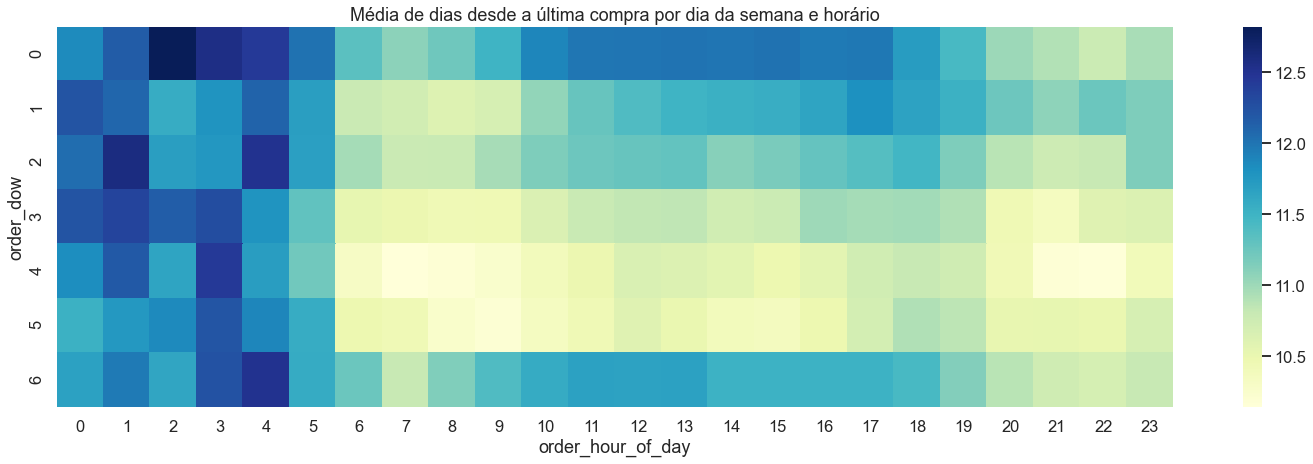

In [38]:
plt.figure(figsize = (25,7))
sns.heatmap(data = df2, cmap="YlGnBu", annot = False)
plt.title('Média de dias desde a última compra por dia da semana e horário')

In [52]:
users_until_10 = orders.groupby("user_id")["order_number"].count()[orders.groupby("user_id")["order_number"].count() <= 10]

In [64]:
df3 = orders[orders['user_id'].isin(users_until_10)].groupby(['order_dow','order_hour_of_day'])['days_since_prior_order'].mean().unstack('order_hour_of_day').fillna(0)

Text(0.5, 1.0, 'Média de dias desde a última compra para usuários com menos de 10 pedidos')

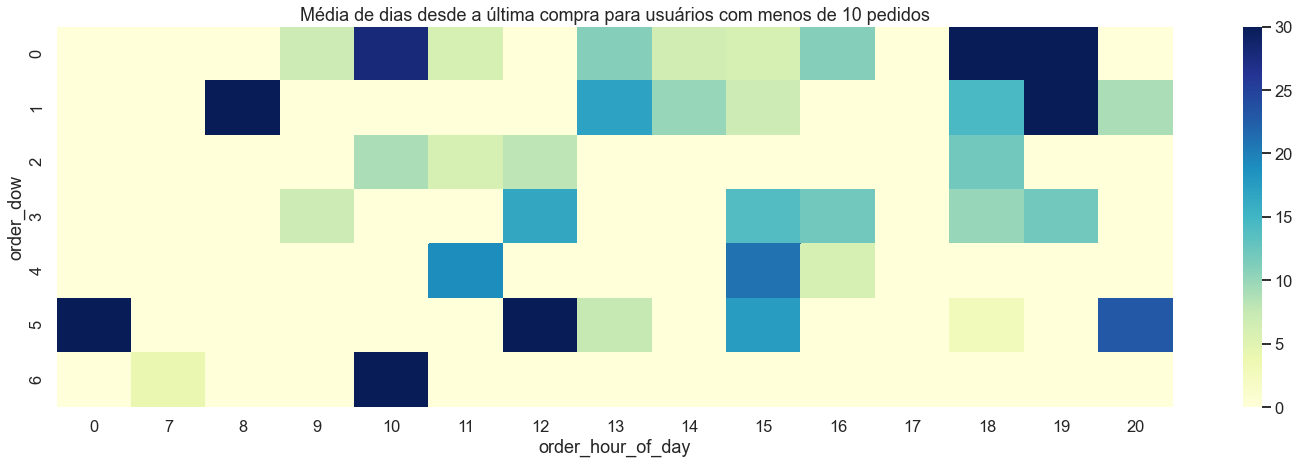

In [65]:
plt.figure(figsize = (25,7))
sns.heatmap(data = df3, cmap="YlGnBu", annot = False)
plt.title('Média de dias desde a última compra para usuários com menos de 10 pedidos')

In [ ]:
plt.figure(figsize = (25,7))
sns.heatmap(data = df2, cmap="YlGnBu", annot = True)